![head.png](https://github.com/iwh-halle/FinancialDataAnalytics/blob/master/figures/head.jpg?raw=1)

# Financial Data Analytics in Python

**Prof. Dr. Fabian Woebbeking**</br>
Assistant Professor of Financial Economics

IWH - Leibniz Institute for Economic Research</br>
MLU - Martin Luther University Halle-Wittenberg

fabian.woebbeking@iwh-halle.de

# Homework: Natural Language Processing (NLP)

You will need a Git/GitHub repository to submit your course deliverables. Consult [**slides.ipynb**](https://github.com/iwh-halle/FinancialDataAnalytics) for help with the tasks below! If you need further assistance, do not hesitate to open a Q&A at https://github.com/iwh-halle/FinancialDataAnalytics/discussions

### Task: Sourcing

The first stage involves sourcing and reading the textual content of scientific papers. You find an example pdf file in ``../lit/nonanswers.pdf``. Please [download](https://scholar.google.de/) and analyze at least one additional paper of your choice (make sure to commit the paper to your repository).

Use an appropriate PDF reading library or tool to programmatically extract the text. You can find an example below, however, you are free to use any Python library you like.

In [8]:
# Step 1: Install pdfminer.six if you haven't already
# You can install it using conda or pip, see 
  # https://anaconda.org/conda-forge/pdfminer.six
  # https://pypi.org/project/pdfminer.six/

# Step 2: Import the required module
from pdfminer.high_level import extract_text

# Step 3: Extract text from PDF file
extracted_text = extract_text('../lit/nonanswers.pdf')
print(extracted_text[0:80])

“Let me get back to you” –
A machine learning approach to measuring
non-answers



In [8]:
from pdfminer.high_level import extract_text

# Step 2: Extract text from PDF file
extracted_text = extract_text('../Research_Paper_on_Basic_of_Artificial_Ne.pdf')
print(extracted_text[0:80])  # Print the first 80 characters for a quick check


International Journal on Recent and Innovation Trends in Computing and Communica


### Task: Pre-processing

Pre-processing is a critical step aimed at cleaning and preparing the text data for analysis. Steps that you should consider:

* Removing punctuation, numbers and special characters using regular expressions.
* Converting all the text to a uniform case (usually lower case) to ensure that the analysis is not case-sensitive.
* Stop word removal, i.e. eliminating commonly used words (e.g., 'and', 'the', 'is') that do not contribute significantly to the overall meaning and can skew the analysis.
* Other potential pre-processing steps might include stemming and lemmatization, depending on the specific requirements and goals of the analysis. (optional)

In [9]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
import nltk
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Remove punctuation, numbers, and special characters
    text = re.sub(r'[^A-Za-z\s]', '', text)
    
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    return ' '.join(words)

# Example usage with the extracted text
cleaned_text = preprocess_text(extracted_text)
print(cleaned_text[:80])  # Print the first 80 characters of the cleaned text for a quick check


international journal recent innovation trends computing communication issn volu


[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Task: Analysis

The final stage is the analysis of the pre-processed text, in order to extract meaningful context. This may involve:

* Frequency Analysis: Determining the most commonly occurring words or phrases, which can provide initial insights into the primary focus areas of the papers. Consider, e.g. a word cloud as a visualization.
* Contextual Analysis: Using more advanced NLP techniques such as Word Embedding or Topic Modeling to understand the context of the papers.
* Sentiment analysis: We would expect that scientific papers are written in a neutral tone, can you confirm this?
* Summarization: Employing algorithms to generate concise summaries of the papers, capturing the key points and findings.

Pick any method that you like (you are allowed to use ChatGPT's API as well).

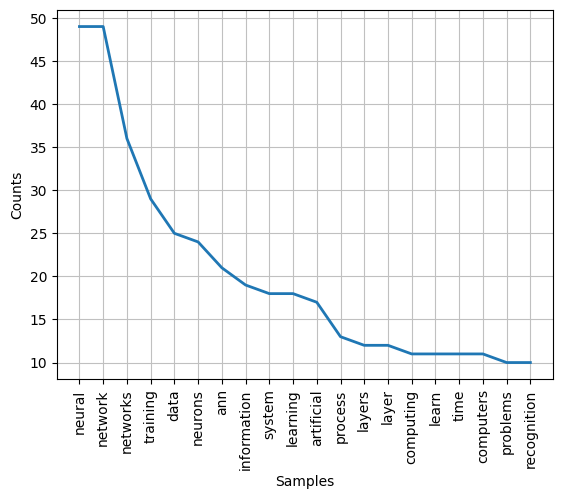

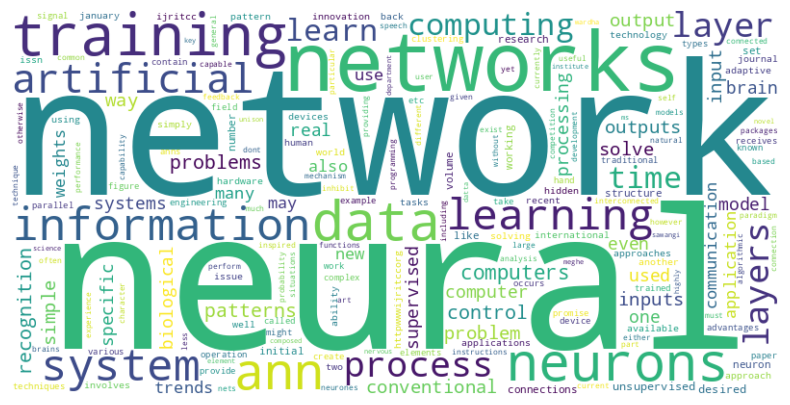

In [10]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def frequency_analysis(text):
    words = text.split()
    freq_dist = FreqDist(words)
    
    # Plot the 20 most common words
    freq_dist.plot(20, cumulative=False)
    
    # Generate and display a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(freq_dist)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Example usage with the cleaned text
frequency_analysis(cleaned_text)


In [11]:
from textblob import TextBlob

def sentiment_analysis(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment
    print(f"Polarity: {sentiment.polarity}, Subjectivity: {sentiment.subjectivity}")

# Example usage with the cleaned text
sentiment_analysis(cleaned_text)


Polarity: 0.012864632484009658, Subjectivity: 0.42316496652136787


In [12]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer

def summarize_text(text, num_sentences=5):
    parser = PlaintextParser.from_string(text, Tokenizer('english'))
    summarizer = LsaSummarizer()
    summary = summarizer(parser.document, num_sentences)
    summary_text = ' '.join([str(sentence) for sentence in summary])
    return summary_text

# Example usage with the cleaned text
summary = summarize_text(cleaned_text)
print(summary)


international journal recent innovation trends computing communication issn volume issue research paper basic artificial neural network ms sonali b maind department information technology datta meghe institute engineering technology research sawangi wardha sonalimaindgmailcom ms priyanka wankar department computer science engineering datta meghe institute engineering technology research sawangi wardha priyankawankargmailcom abstractan artificial neural network ann information processing paradigm inspired way biological nervous systems brain process information key element paradigm novel structure information processing system composed large number highly interconnected processing elements neurons working unison solve specific problems anns like people learn example ann configured specific application pattern recognition data classification learning process learning biological systems involves adjustments synaptic connections exist neurons true anns well paper gives overview artificial 